In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:


# Initialize DataFrame with multiclass target variable
df = pd.DataFrame({
    'x1': [4, 2, 1, 3, 1, 6],
    'x2': [1, 8, 0, 2, 4, 7],
    'y': [0, 1, 2, 0, 2, 1]  # Multiclass labels
})

# Initialize coefficients and learning rate
lr = 0.01
n_classes = len(np.unique(df['y']))

# Store coefficients for each class
coefficients = np.zeros((n_classes, 3))  # 3 coefficients: b0, b1, b2
log_errors = []

# One-vs-Rest Logistic Regression for each class
for i in range(n_classes):
    b0, b1, b2 = 0, 0, 0  # Initialize coefficients for each class
    epoch_errors = []
    pass_preds = []
    
    for epoch in range(1000):  # Training loop (1000 epochs)
        epoch_errors = []
        pred_probs = []
        
        for j in range(len(df)):
            # Convert multiclass target into binary (OvR)
            y_binary = 1 if df['y'][j] == i else 0
            
            # Logistic regression prediction (linear combination + sigmoid)
            z = b0 + (b1 * df['x1'][j] + b2 * df['x2'][j])
            pred_prob = 1 / (1 + np.exp(-z))
            pred_probs.append(pred_prob)
            
            # Error calculation
            error = pred_prob - y_binary
            epoch_errors.append(error)
            
            # Pass or fail prediction
            pass_pred = 1 if pred_prob > 0.5 else 0
            pass_preds.append(pass_pred)
        
        # Update coefficients
        b0 -= (lr * np.sum(epoch_errors)) / len(df)
        b1 -= (lr * np.sum(epoch_errors * df['x1'])) / len(df)
        b2 -= (lr * np.sum(epoch_errors * df['x2'])) / len(df)
        
        # Log error (negative log likelihood)
        log_error = (-1 / len(df)) * (np.sum(y_binary * np.log(pred_probs) + (1 - y_binary) * np.log(1 - np.array(pred_probs))))
        log_errors.append(log_error)
    
    # Store the final coefficients for this class
    coefficients[i] = [b0, b1, b2]

    print(f'Class {i} - Coefficients: b0={b0}, b1={b1}, b2={b2}')

# Final coefficients for all classes
print("\nFinal Coefficients for all classes (OvR):")
for i in range(n_classes):
    print(f'Class {i}: b0={coefficients[i][0]}, b1={coefficients[i][1]}, b2={coefficients[i][2]}')


Class 0 - Coefficients: b0=-0.3579489417312394, b1=0.8664312822989575, b2=-0.9579327291808118
Class 1 - Coefficients: b0=-1.5114631308844304, b1=-0.22295948357456882, b2=0.518264338230998
Class 2 - Coefficients: b0=0.9770612771464324, b1=-0.8707554869189524, b2=-0.06352625772825204

Final Coefficients for all classes (OvR):
Class 0: b0=-0.3579489417312394, b1=0.8664312822989575, b2=-0.9579327291808118
Class 1: b0=-1.5114631308844304, b1=-0.22295948357456882, b2=0.518264338230998
Class 2: b0=0.9770612771464324, b1=-0.8707554869189524, b2=-0.06352625772825204


In [4]:
df['z']=b0+(b1*df['x1'] + b2*df['x2'])
df['my_prob']=1/(1+np.exp(-df['z']))
df['my_pred']=np.where(df['my_prob']>0.5,1,0)
df[['my_prob','my_pred','y']]

,my_prob,my_pred,y
0,0.059012,0,2
1,0.000126,0,-14
2,0.366092,0,1
3,0.033378,0,-1
4,0.010360,0,-7
5,0.000068,0,-8


In [5]:
#Accuracy
# Calculate accuracy
accuracy = (df['my_pred'] == df['y']).mean()

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
# Features and target
X = df[['x1','x2']]
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Retrieve the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:")
print(coefficients)
print("Intercept:")
print(intercept)

Coefficients:
[[1.01723881]]
Intercept:
[-4.72156956]


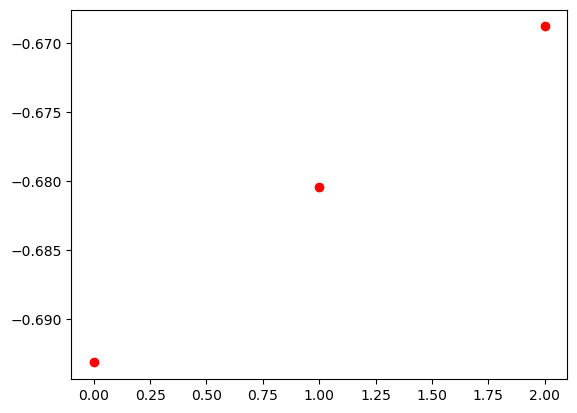

In [9]:
plt.scatter([0,1,2],log_errors,color='red',marker='o')